<a href="https://colab.research.google.com/github/ZaKSa/neural-networks-8semester-/blob/marathon/%D0%97%D0%B0%D1%86%D0%B5%D0%BF%D0%B8%D0%BD%D0%B0_%227_%D0%9E%D0%B1%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%BE%D1%81%D1%82%D1%80%D0%B0%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%B8_%D0%BD%D0%B5%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%BE%D1%81%D1%82%D1%8C_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Зацепина 6407

1. сделано

2. Виды функций активации(ФА):
логистический сигмоинд, гиперболический тангенс, ступенчатая функция, ReLU
Преимущество ReLU описано ниже. 
сделано

3. Эпоха - одна итерация в процессе обучения, включающая предъявление всех примеров из обучающего множества и, возможно, проверку качества обучения на контрольном множестве. Процесс обучения осуществляется на обучающей выборке.



Функция активации

Нелинейный фа

Для любой трёхслойной сети существует двухслойная с идентичным поведением

Наложение сетей-не даёт преимуществ

---
Мы последовательно умножаем матрицы весов на вектор.
Если запишем эти матрично-векторные умножения в одну строчку, то увидим, что 2 матрицы весов w,w' можно объединить в одну матрицу з. Останется одно векторно-матричное умножение. Один слой нейронной сети. Если добавить нелинейную фа, то проблема исчезнет.

Одним из этапов разработки нейронной сети является выбор функции активации нейронов. Вид функции активации во многом определяет функциональные возможности нейронной сети и метод обучения этой сети. Классический алгоритм обратного распространения ошибки хорошо работает на двухслойных и трехслойных нейронных сетях, но при дальнейшем увеличении глубины начинает испытывать проблемы. Одна из причин — так называемое затухание градиентов. По мере распространения ошибки от выходного слоя к входному на каждом слое происходит домножение текущего результата на производную функции активации. Производная у традиционной сигмоидной функции активации меньше единицы на всей области определения, поэтому после нескольких слоев ошибка станет близкой к нулю. Если же, наоборот, функция активации имеет неограниченную производную (как, например, гиперболический тангенс), то может произойти взрывное увеличение ошибки по мере распространения, что приведет к неустойчивости процедуры обучения.



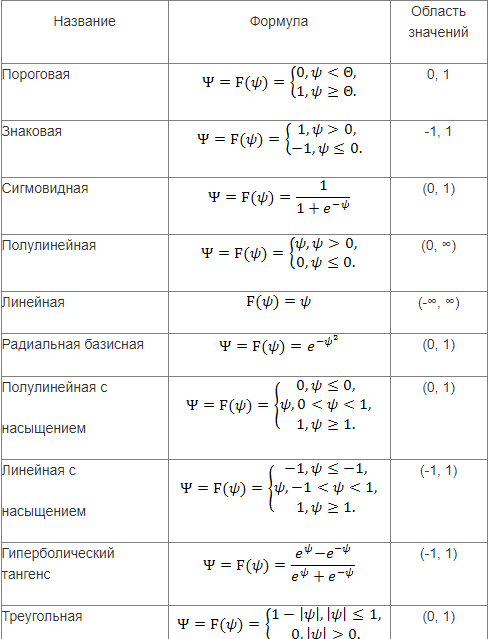

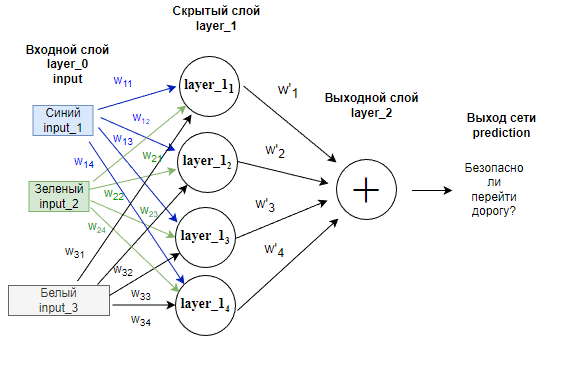

Введем обозначения:

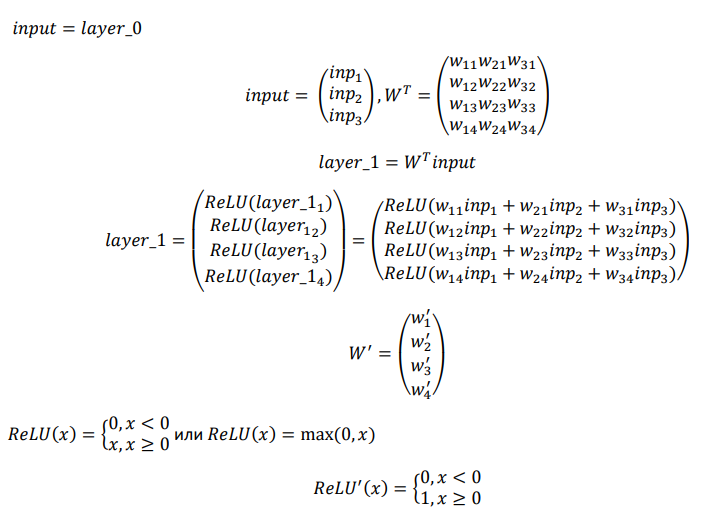

Обратный проход.
1. Коррекция весов W'. Та же процедура, что вы реализовывали ранее:



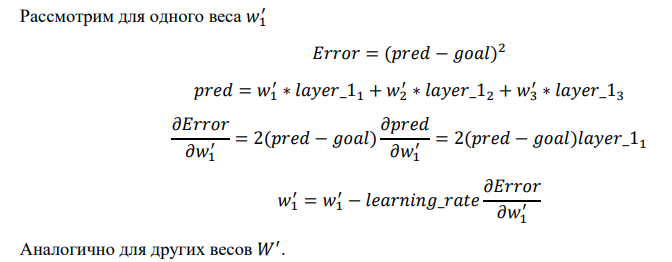

2.	Коррекция весов W:

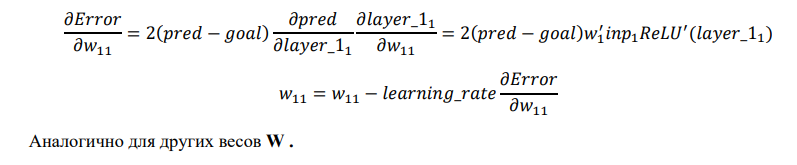

1. Добавьте нелинейность на скрытом слое и реализуйте обучение сети на полном наборе данных. Постройте график функции потерь в процессе обучения. 

Почему значений в hidden_size 3, а не 4?

In [ ]:
import numpy as np

def relu(x):
	return np.maximum(0.0, x)

def relu_(x): #ФА
	return  0 if x<0 else 1

np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

learning_rate = 0.2
hidden_size = 3

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями 


#forward pass
layer_0 = lights
print("layer 0", layer_0)
layer_1 = np.dot(layer_0,weights_0_1)
print("layer 1", layer_1)

ReLU_=[]
for i in range(len(layer_1[0])):
   ReLU_.append(relu_(layer_1[0][i]))

layer_2 = np.dot(layer_1,weights_1_2)
print("layer 2", layer_2)
error = (layer_2-walk_stop)**2
print("Error",error)

print("ReLU_(l1) ", ReLU_)
#backward pass

layer_2_delta=2*(layer_2-walk_stop)
weight_1_2_corrections = layer_1.T.dot(layer_2_delta) #величина коррекции для весов между layer_1 и layer_2

layer_1_delta=layer_2_delta.dot(weights_1_2.T)
weight_0_1_corrections = layer_0.T.dot(layer_1_delta) #величина коррекции для весов между layer_0 и layer_1

weight_0_1_corrections_res= weight_0_1_corrections.dot(ReLU_) #добавили умножение на функцию активации

weights_1_2 -= learning_rate * weight_1_2_corrections
weights_0_1 -= learning_rate * weight_0_1_corrections

layer 0 [[1 0 1]
 [0 1 1]
 [0 0 1]
 [1 1 1]]
layer 1 [[-0.79343557  0.13177044 -1.2062363 ]
 [-1.02281443 -1.01536676 -1.02178786]
 [-0.62747958 -0.30887855 -0.20646505]
 [-1.18877042 -0.57471778 -2.02155911]]
layer 2 [[-0.52972967]
 [-0.2938203 ]
 [-0.07527796]
 [-0.74827201]]
Error [[2.34007288]
 [1.67397096]
 [0.00566677]
 [0.559911  ]]
ReLU_(l1)  [0, 1, 0]


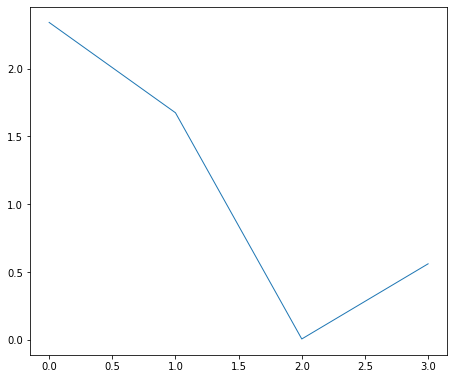

In [ ]:
import matplotlib.pyplot as plt

# График ошибки
fig = plt.figure(figsize=(12, 10), constrained_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(np.arange(len(error)), error, linewidth = 1)

layer 0 [[1 0 1]]
layer 1 [[-0.79343557  0.13177044 -1.2062363 ]]
layer 2 [[-0.52972967]]
Error [array([[2.34007288]])]
ReLU_(l1)  [0, 1, 0]
layer 0 [[1 0 1]]
layer 1 [[-0.69842899 -0.06600644 -0.75289908]]
layer 2 [[0.5670101]]
Error [array([[2.34007288]]), array([[0.18748026]])]
ReLU_(l1)  [0, 0, 0]
layer 0 [[1 0 1]]
layer 1 [[-0.83970955 -0.09405785 -0.88024909]]
layer 2 [[0.89115925]]
Error [array([[2.34007288]]), array([[0.18748026]]), array([[0.01184631]])]
ReLU_(l1)  [0, 0, 0]
layer 0 [[1 0 1]]
layer 1 [[-0.88575601 -0.10210455 -0.92361527]]
layer 2 [[1.00604687]]
Error [array([[2.34007288]]), array([[0.18748026]]), array([[0.01184631]]), array([[3.65646877e-05]])]
ReLU_(l1)  [0, 0, 0]
[2.34007288e+00 1.87480256e-01 1.18463079e-02 3.65646877e-05]


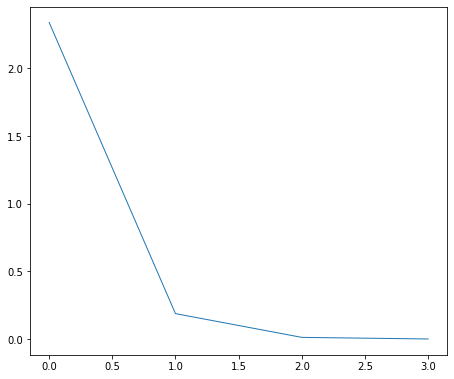

In [ ]:
#второй способ с помощью цикла, а не векторно. График в первом способе не понравился
import numpy as np

def relu(x):
	return np.maximum(0.0, x)

def relu_(x): #ФА
	return  0 if x<0 else 1

np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

learning_rate = 0.2
hidden_size = 3

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями 

error=[]
for i in range(len(lights)):
  #forward pass
  layer_0 = lights[0:1]
  print("layer 0", layer_0)
  layer_1 = np.dot(layer_0,weights_0_1)
  print("layer 1", layer_1)

  ReLU_=[]
  for i in range(len(layer_1[0])):
     ReLU_.append(relu_(layer_1[0][i]))

  layer_2 = np.dot(layer_1,weights_1_2)
  print("layer 2", layer_2)
  error.append((layer_2-walk_stop[0:1])**2)
  
  print("Error",error)

  print("ReLU_(l1) ", ReLU_)
  #backward pass

  layer_2_delta=2*(layer_2-walk_stop[0:1])
  weight_1_2_corrections = layer_1.T.dot(layer_2_delta) #величина коррекции для весов между layer_1 и layer_2

  layer_1_delta=layer_2_delta.dot(weights_1_2.T)
  weight_0_1_corrections = layer_0.T.dot(layer_1_delta) #величина коррекции для весов между layer_0 и layer_1

  weight_0_1_corrections_res= weight_0_1_corrections.dot(ReLU_) #добавили умножение на функцию активации

  weights_1_2 -= learning_rate * weight_1_2_corrections
  weights_0_1 -= learning_rate * weight_0_1_corrections
error=np.ravel(error)
import matplotlib.pyplot as plt
print( error)
# График ошибки
fig = plt.figure(figsize=(12, 10), constrained_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(np.arange(len(error)), error, linewidth = 1)

Двумя дополнительными основными преимуществами ReLUs являются разреженность и меньшая вероятность исчезновения градиента. 

Одним из основных преимуществ является снижение вероятности исчезновения градиента. НПостоянный градиент ReLUs приводит к более быстрому обучению.

Другим преимуществом ReLUs является разреженность. 

---
Sigmoid: не взрывается при активации
Relu: не исчезающий градиент

Более эффективно вычислять, чем сигмоидоподобные функции (просто нужно выбрать max(0, x)) и не выполнять дорогостоящие экспоненциальные операции, как в Sigmoid


На практике сети с Relu, как правило, демонстрируют лучшую производительность конвергенции, чем sigmoid. 

2. Выберите другую функцию активации и запустите обучение. 

ФА sigmoid из библиотеки

In [ ]:
import numpy as np
from scipy. special import expit

def relu(x):
	return np.maximum(0.0, x)

def relu_(x): #ФА
	return  0 if x<0 else 1

np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

learning_rate = 0.2
hidden_size = 3

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями 


#forward pass
layer_0 = lights
print("layer 0", layer_0)
layer_1 = np.dot(layer_0,weights_0_1)
print("layer 1", layer_1)

sigmoid=[]
sigmoid=expit(layer_1[0])

layer_2 = np.dot(layer_1,weights_1_2)
print("layer 2", layer_2)
error = (layer_2-walk_stop)**2
print("Error",error)

print("sigmoid_(l1) ", sigmoid)
#backward pass

layer_2_delta=2*(layer_2-walk_stop)
weight_1_2_corrections = layer_1.T.dot(layer_2_delta) #величина коррекции для весов между layer_1 и layer_2

layer_1_delta=layer_2_delta.dot(weights_1_2.T)
weight_0_1_corrections = layer_0.T.dot(layer_1_delta) #величина коррекции для весов между layer_0 и layer_1

weight_0_1_corrections_res= weight_0_1_corrections.dot(sigmoid) #добавили умножение на функцию активации

weights_1_2 -= learning_rate * weight_1_2_corrections
weights_0_1 -= learning_rate * weight_0_1_corrections

layer 0 [[1 0 1]
 [0 1 1]
 [0 0 1]
 [1 1 1]]
layer 1 [[-0.79343557  0.13177044 -1.2062363 ]
 [-1.02281443 -1.01536676 -1.02178786]
 [-0.62747958 -0.30887855 -0.20646505]
 [-1.18877042 -0.57471778 -2.02155911]]
layer 2 [[-0.52972967]
 [-0.2938203 ]
 [-0.07527796]
 [-0.74827201]]
Error [[2.34007288]
 [1.67397096]
 [0.00566677]
 [0.559911  ]]
sigmoid_(l1)  [0.31143146 0.53289503 0.23036767]


PReLU

In [ ]:
import tensorflow as tf

def relu(x):
	return np.maximum(0.0, x)
 
def PReLU(_x, alfa):
  return alfa*_x if _x<0 else relu(_x)

import numpy as np
from scipy. special import expit



def relu_(x): #ФА
	return  0 if x<0 else 1

np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

learning_rate = 0.2
hidden_size = 3

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями 


#forward pass
layer_0 = lights
print("layer 0", layer_0)
layer_1 = np.dot(layer_0,weights_0_1)
print("layer 1", layer_1)

PReLu=[]
for i in range(len(layer_1[0])):
  PReLu.append(PReLU(layer_1[0][i], 0.1))

layer_2 = np.dot(layer_1,weights_1_2)
print("layer 2", layer_2)
error = (layer_2-walk_stop)**2
print("Error",error)

print("PReLu_(l1) ", PReLu)
#backward pass

layer_2_delta=2*(layer_2-walk_stop)
weight_1_2_corrections = layer_1.T.dot(layer_2_delta) #величина коррекции для весов между layer_1 и layer_2

layer_1_delta=layer_2_delta.dot(weights_1_2.T)
weight_0_1_corrections = layer_0.T.dot(layer_1_delta) #величина коррекции для весов между layer_0 и layer_1

weight_0_1_corrections_res= weight_0_1_corrections.dot(PReLu) #добавили умножение на функцию активации

weights_1_2 -= learning_rate * weight_1_2_corrections
weights_0_1 -= learning_rate * weight_0_1_corrections

layer 0 [[1 0 1]
 [0 1 1]
 [0 0 1]
 [1 1 1]]
layer 1 [[-0.79343557  0.13177044 -1.2062363 ]
 [-1.02281443 -1.01536676 -1.02178786]
 [-0.62747958 -0.30887855 -0.20646505]
 [-1.18877042 -0.57471778 -2.02155911]]
layer 2 [[-0.52972967]
 [-0.2938203 ]
 [-0.07527796]
 [-0.74827201]]
Error [[2.34007288]
 [1.67397096]
 [0.00566677]
 [0.559911  ]]
PReLu_(l1)  [-0.07934355678395102, 0.13177044097041168, -0.12062363019039704]


Одна эпоха означает, что каждая выборка в наборе обучающих данных имела возможность обновить внутренние параметры модели. Эпоха состоит из одной или нескольких пакетов-партий.

Если hidden_size=4

In [ ]:
import numpy as np

def relu(x):
	return np.maximum(0.0, x)

def relu_(x): #ФА
	return  0 if x<0 else 1

np.random.seed(1)

lights = np.array( [[ 1, 0, 1 ],
                    [ 0, 1, 1 ],
                    [ 0, 0, 1 ],
                    [ 1, 1, 1 ] ] )

walk_stop = np.array([[ 1, 1, 0, 0]]).T

learning_rate = 0.2
hidden_size = 4

weights_0_1 = 2*np.random.random((3,hidden_size)) - 1 #веса между входным и скрытым слоями
weights_1_2 = 2*np.random.random((hidden_size,1)) - 1 #веса между скрытым и выходным слоями 


#forward pass
layer_0 = lights
print("layer 0", layer_0)
layer_1 = np.dot(layer_0,weights_0_1)
print("layer 1", layer_1)

ReLU_=[]
for i in range(len(layer_1[0])):
   ReLU_.append(relu_(layer_1[0][i]))

layer_2 = np.dot(layer_1,weights_1_2)
print("layer 2", layer_2)
error = (layer_2-walk_stop)**2
print("Error",error)

print("ReLU_(l1) ", ReLU_)
#backward pass

layer_2_delta=2*(layer_2-walk_stop)
weight_1_2_corrections = layer_1.T.dot(layer_2_delta) #величина коррекции для весов между layer_1 и layer_2

layer_1_delta=layer_2_delta.dot(weights_1_2.T)
weight_0_1_corrections = layer_0.T.dot(layer_1_delta) #величина коррекции для весов между layer_0 и layer_1

weight_0_1_corrections_res= weight_0_1_corrections.dot(ReLU_) #добавили умножение на функцию активации

weights_1_2 -= learning_rate * weight_1_2_corrections
weights_0_1 -= learning_rate * weight_0_1_corrections

layer 0 [[1 0 1]
 [0 1 1]
 [0 0 1]
 [1 1 1]]
layer 1 [[-0.37242104  0.51828245 -1.16138222 -0.02489585]
 [-0.91295327 -0.73768934 -0.78909055  0.06156045]
 [-0.20646505  0.07763347 -0.16161097  0.370439  ]
 [-1.07890926 -0.29704036 -1.7888618  -0.3337744 ]]
layer 2 [[1.70135909]
 [0.74863225]
 [0.45980403]
 [1.99018731]]
Error [[0.49190458]
 [0.06318575]
 [0.21141974]
 [3.96084554]]
ReLU_(l1)  [0, 1, 0, 0]
